In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

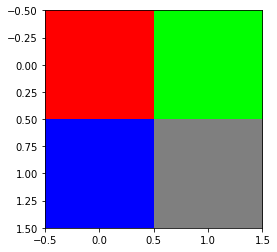

In [2]:
color1=[255,0,0]
color2=[0,255,0]
color3=[0,0,255]
color4=[127,127,127]

plt.imshow(np.array([
    [color1, color2],
    [color3, color4],
]))

<p style="border: 2px rgb(255,0,0)solid">R:255,G:0,B:0</p>

OpenCV (Open Source Computer Vision Library: http://opencv.org) is an open-source library that includes several hundreds of computer vision algorithms. The document describes the so-called OpenCV 2.x API, which is essentially a C++ API, as opposed to the C-based OpenCV 1.x API (C API is deprecated and not tested with "C" compiler since OpenCV 2.4 releases)

OpenCV has a modular structure, which means that the package includes several shared or static libraries.

In [3]:
!pip install opencv-python

In [4]:
import cv2

In [5]:
# read image
image=cv2.imread("Bird.jpg")


In [6]:
type(image)

numpy.ndarray

In [7]:
image.shape # Dimensions: 999 x 562 and 3 is for like each color is shown by 3 different components of color.

(562, 999, 3)

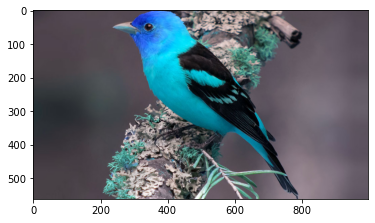

In [8]:
plt.imshow(image)

   What we see here is that both images have different color components. Because by defualt opencv its not using RGB model, Its actually using **BGR (Blue Green Red) model.** 

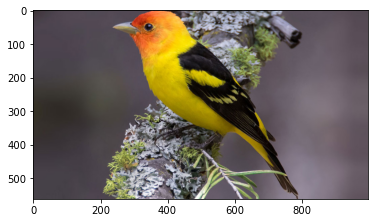

In [9]:
## We can change BGR to RGB :
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Show image:
plt.imshow(image)

## 1) K-means clustering algorithm: 
* K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science.
* K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.
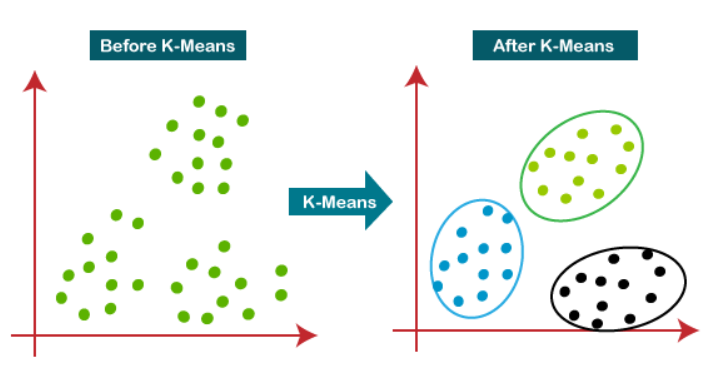
* each cluster has datapoints with some commonalities, and it is away from other clusters.

In [10]:
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt 
import cv2

In [11]:
# Utility fuctions such as rgb2hex:

def rgb2hex(rgb):
    hex="#{:02x}{:02x}{:02x}".format(int(rgb[0]),int(rgb[1]),int(rgb[2]))
    return hex
print(rgb2hex([255,0,0]))

#ff0000


In [12]:
# We are going to define ML model which is etremely simple:

def plot_image(path, k=6):
    #Load image
    img_bgr=cv2.imread(path)
    img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
    
    # resize image : this is very important step because remember that a picture is made up of pixels(dimesnsions)
    # So, If we don't resize image when working with ML model, it's going to take a lot of timeto train.
    resized_img_rgb=cv2.resize(img_rgb,(100,100),interpolation=cv2.INTER_AREA)
    
    # reshape image to be a list of pixels
    img_list=resized_img_rgb.reshape((resized_img_rgb.shape[0] * resized_img_rgb.shape[1],3))
    
    
    # Create K-Means model ie. The machine learning model that one is extracting the colors out of this picture:
    clt=KMeans(n_clusters=k) # creating the model with how many clusters we want.
    
    labels=clt.fit_predict(img_list) # then we are fitting it ie. when we fit it 
    #we create the labels kind of extract those labels
    # then we show pie chart here as below:
    
    # count labels to find most popular one:
    label_counts=Counter(labels)
    total_count=sum(label_counts.values())
    
    # subset out most popular centroid:
    center_colors=list(clt.cluster_centers_)
    ordered_colors=[center_colors[i]/255 for i in label_counts.keys()]
    color_labels=[rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()]
    
    
    # PLOTS:
    plt.figure(figsize=(14,8))
    plt.subplot(221)
    plt.imshow(img_rgb)
    plt.axis('off')
    
    plt.subplot(222)
    plt.pie(label_counts.values(), labels=color_labels, colors=ordered_colors, startangle=90)
    plt.axis('equal')
    plt.show()
    

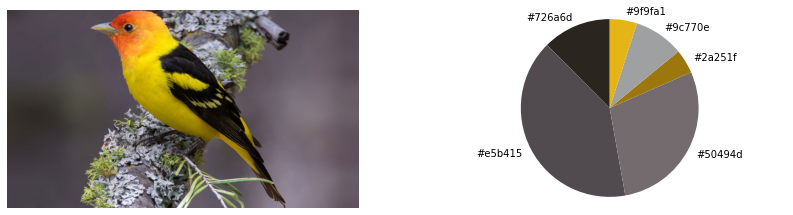

In [13]:
plot_image('Bird.jpg')

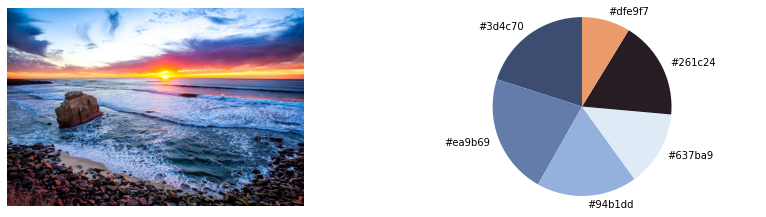

In [14]:
plot_image('sea.jpg')

If we are loading different pictures and run the code it is finding different results, Because the clusters are created they are initialized randomly. So, The machine leaning model the one which extracting the colors out of these pictures is pretty simple and done by two line above in code.
* ie. Creating the model
* and fitting it means when we fit it we create the labels and we can kind of extract those labels
* then we show the pie chart 

* So, the main thing here is image processing part 
     * reading the image, transforming it, resizing it etc.. 

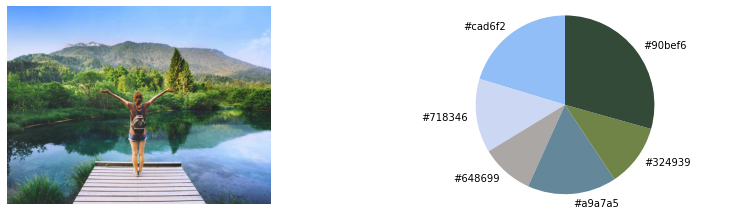

In [15]:
plot_image('nature.jpg')